In [1]:
%matplotlib inline

from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels as ss
import seaborn as sns
import sys
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams['figure.figsize'] = [16, 10]
%matplotlib inline

# **Read Data**

We can choose any certain person

In [2]:
df = pd.read_csv('block_10.csv', parse_dates=['day'])
df

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,MAC000322,2012-03-07,0.125,0.104,0.133,0.145,0.109,0.298,0.149,0.119,...,0.087,0.092,0.187,0.130,0.096,0.096,0.137,0.101,0.137,0.485
1,MAC000322,2012-03-08,0.279,0.247,0.253,0.275,0.114,0.105,0.117,0.141,...,0.105,0.132,0.252,0.105,0.096,0.129,0.120,0.070,0.039,0.074
2,MAC000322,2012-03-09,0.036,0.130,0.364,0.120,0.100,0.118,0.146,0.105,...,0.028,0.030,0.072,0.038,0.029,0.046,0.069,0.029,0.050,0.520
3,MAC000322,2012-03-10,0.435,0.093,0.105,0.138,0.099,0.096,0.133,0.129,...,0.120,0.125,0.115,0.101,0.142,0.112,0.099,0.150,0.152,0.097
4,MAC000322,2012-03-11,0.187,0.122,0.094,0.109,0.139,0.099,0.111,0.137,...,0.036,0.100,0.358,0.122,0.095,0.111,0.141,0.097,0.095,0.122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31473,MAC005354,2014-02-23,0.103,0.069,0.101,0.144,0.080,0.061,0.105,0.130,...,0.078,0.098,0.124,0.130,0.116,0.110,0.112,0.130,0.086,0.126
31474,MAC005354,2014-02-24,0.100,0.109,0.088,0.121,0.086,0.084,0.101,0.103,...,0.064,0.114,0.135,0.141,0.081,0.130,0.128,0.090,0.109,0.152
31475,MAC005354,2014-02-25,0.110,0.069,0.103,0.140,0.082,0.061,0.112,0.129,...,0.084,0.076,0.134,0.150,0.104,0.080,0.124,0.122,0.122,0.095
31476,MAC005354,2014-02-26,0.130,0.102,0.086,0.102,0.105,0.096,0.062,0.115,...,0.067,0.102,0.134,0.122,0.098,0.086,0.145,0.106,0.090,0.121


In [3]:
df['LCLid'].unique()

array(['MAC000322', 'MAC000393', 'MAC000462', 'MAC000522', 'MAC000531',
       'MAC000830', 'MAC000857', 'MAC000884', 'MAC000931', 'MAC000985',
       'MAC001221', 'MAC001235', 'MAC001352', 'MAC001402', 'MAC001420',
       'MAC001437', 'MAC001867', 'MAC001869', 'MAC002010', 'MAC002014',
       'MAC002024', 'MAC002036', 'MAC002050', 'MAC002063', 'MAC002153',
       'MAC002375', 'MAC002725', 'MAC002765', 'MAC002851', 'MAC002928',
       'MAC002929', 'MAC002931', 'MAC003708', 'MAC004016', 'MAC004178',
       'MAC004193', 'MAC004198', 'MAC004205', 'MAC004225', 'MAC004399',
       'MAC004740', 'MAC004959', 'MAC005211', 'MAC005219', 'MAC005224',
       'MAC005255', 'MAC005280', 'MAC005324', 'MAC005349', 'MAC005354'],
      dtype=object)

In [4]:
df = df[df['LCLid'] == 'MAC002928']
df

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
17623,MAC002928,2012-07-03,0.042,0.047,0.062,0.043,0.043,0.064,0.045,0.041,...,0.321,0.256,0.684,0.482,0.784,0.060,0.141,0.280,0.044,0.063
17624,MAC002928,2012-07-04,0.044,0.042,0.058,0.052,0.043,0.050,0.060,0.043,...,0.000,0.016,0.036,0.059,0.344,0.480,0.241,0.413,0.131,0.047
17625,MAC002928,2012-07-05,0.054,0.068,0.049,0.049,0.069,0.054,0.048,0.060,...,0.001,0.000,0.084,0.107,0.056,0.047,0.166,0.214,0.189,0.245
17626,MAC002928,2012-07-06,0.102,0.049,0.048,0.069,0.053,0.049,0.063,0.061,...,0.110,0.016,0.056,0.071,0.047,0.062,0.055,0.269,0.188,0.312
17627,MAC002928,2012-07-07,0.085,0.060,0.059,0.047,0.055,0.064,0.047,0.050,...,0.214,0.193,0.217,0.205,0.475,0.525,0.513,0.502,0.506,1.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18213,MAC002928,2014-02-23,0.099,0.055,0.069,0.050,0.048,0.063,0.059,0.048,...,0.056,0.278,0.952,1.275,0.527,0.260,0.189,0.181,0.287,0.434
18214,MAC002928,2014-02-24,0.169,0.048,0.222,0.280,0.049,0.059,0.064,0.048,...,0.524,1.007,0.751,0.381,0.334,0.100,0.052,0.080,0.083,0.099
18215,MAC002928,2014-02-25,0.048,0.051,0.069,0.049,0.047,0.068,0.054,0.048,...,0.746,1.395,0.650,0.442,0.317,0.068,0.181,0.264,0.218,0.362
18216,MAC002928,2014-02-26,0.169,0.066,0.056,0.048,0.060,0.061,0.047,0.053,...,0.274,0.588,0.872,0.377,0.342,0.247,0.056,0.224,0.151,0.350


# **Data Preprocessing**

The data has row per day, with columns of 30 min intervals, we need only one column with datetime instead of 48 columns to represent the time and another column with the energy consumption for each 30 min interval.

In [5]:
def convert_standard_form_to_expand_time_series(standard_df,  verbose=False):
    # Similar to compact steps
    expand_df = pd.melt(standard_df, id_vars=['day','LCLid'],value_name='energy_consumption',var_name='offset')
    expand_df['offset'] = expand_df['offset'].str.replace('hh_','').astype(int)
    expand_df = expand_df.sort_values(by=['day','offset']).reset_index(drop=True)
    expand_df['frequency'] = '30min'
    expand_df['serie_length'] = len(expand_df)
    ## Here we resample our day column to construct a timestamp column with frequenct 30min
    expand_df['timestamp'] = pd.date_range(start=standard_df['day'].min(), freq='30min', periods=len(expand_df))
    ## Drop unnecessary columns
    expand_df = expand_df.drop(columns=['day','offset'])
    expand_df = expand_df[['LCLid','timestamp','energy_consumption','frequency','serie_length']]
    if verbose:
        display(expand_df)
    return expand_df

In [6]:
expanded_df = convert_standard_form_to_expand_time_series(df).drop(columns=['serie_length','frequency'])
expanded_df

,LCLid,timestamp,energy_consumption
0,MAC002928,2012-07-03 00:00:00,0.042
1,MAC002928,2012-07-03 00:30:00,0.047
2,MAC002928,2012-07-03 01:00:00,0.062
3,MAC002928,2012-07-03 01:30:00,0.043
4,MAC002928,2012-07-03 02:00:00,0.043
...,...,...,...
28555,MAC002928,2014-02-17 21:30:00,0.761
28556,MAC002928,2014-02-17 22:00:00,0.308
28557,MAC002928,2014-02-17 22:30:00,0.447
28558,MAC002928,2014-02-17 23:00:00,0.261


Let's convert this data to hourly, daily weekly and monthly data

In [7]:
def plot_time_series(df,title='Energy Consumption Over Time'):
    plt.figure(figsize=(20,5))
    plt.plot(df['timestamp'], df['energy_consumption'], label= "True Data", color='black')

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Energy Consumption')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)

# **Visualization**

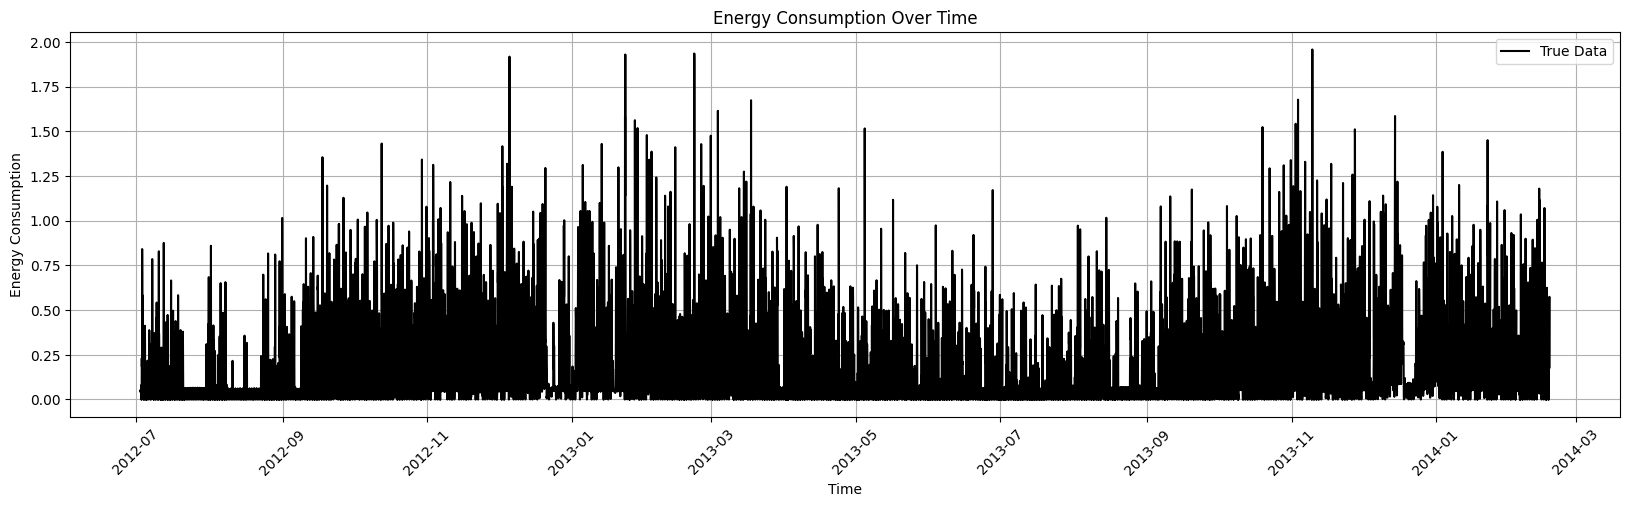

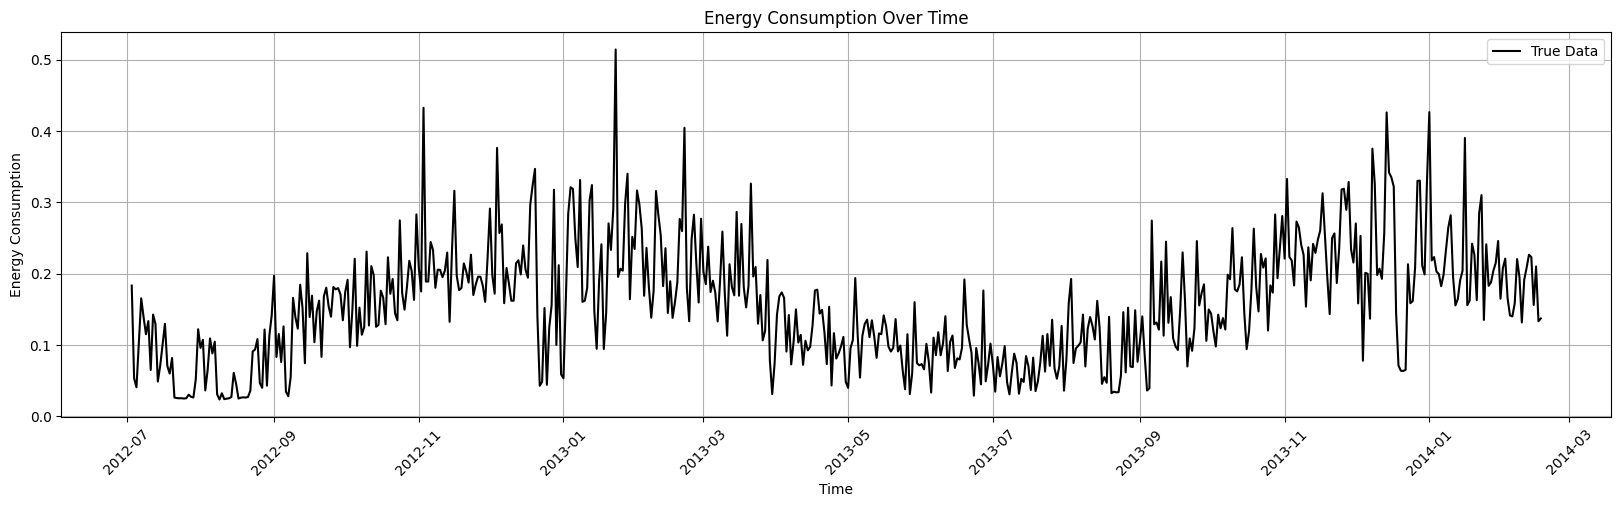

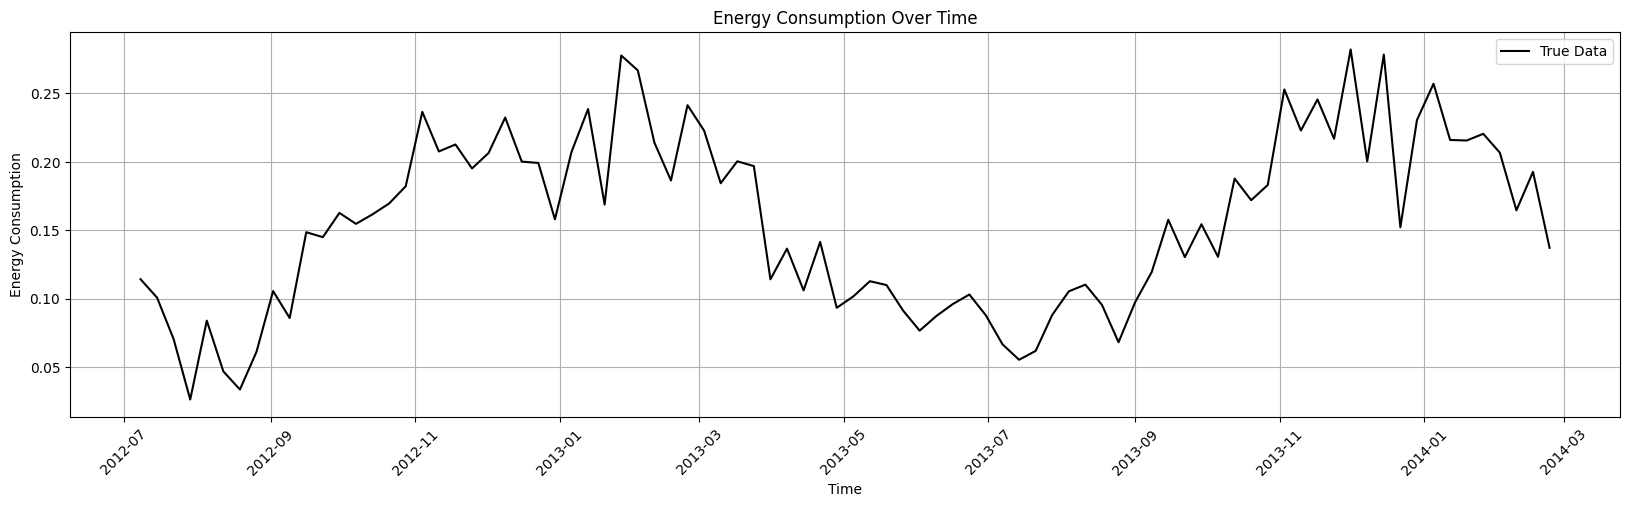

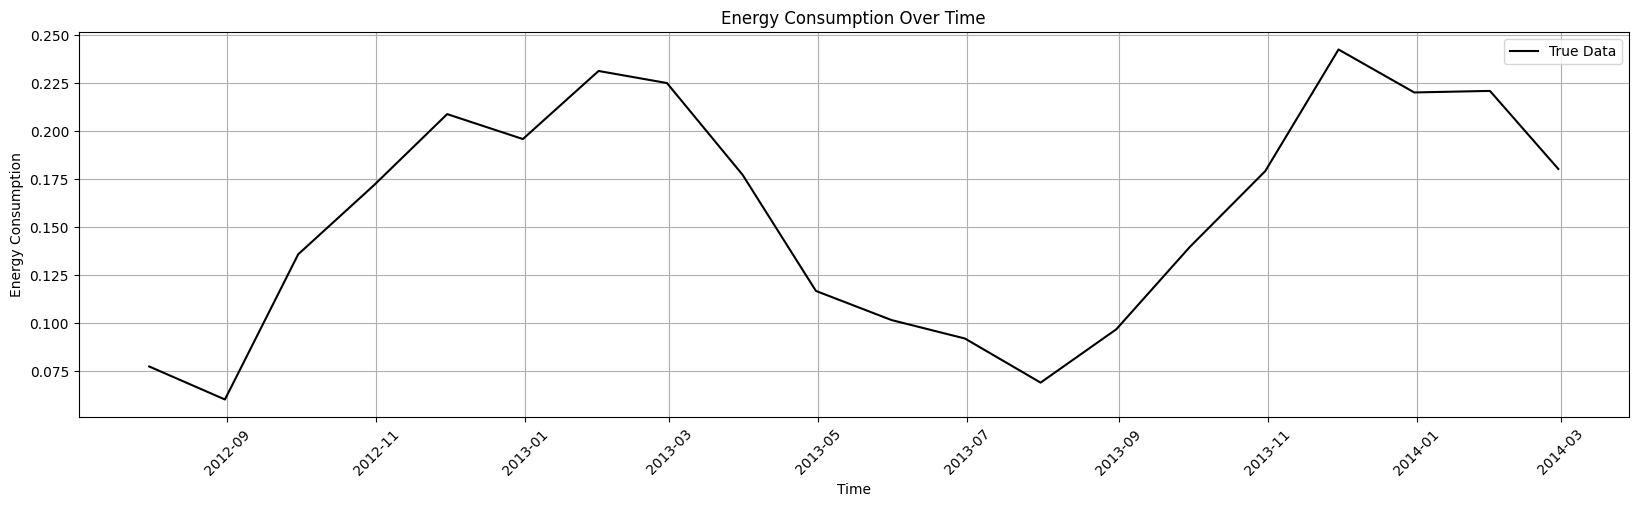

In [8]:
hourly_df = expanded_df.set_index('timestamp').groupby('LCLid').resample('H')['energy_consumption'].mean().round(4).reset_index()
plot_time_series(hourly_df)

daily_df = expanded_df.set_index('timestamp').groupby('LCLid').resample('D')['energy_consumption'].mean().round(4).reset_index()
plot_time_series(daily_df)

weekly_df = expanded_df.set_index('timestamp').groupby('LCLid').resample('W')['energy_consumption'].mean().round(4).reset_index()
plot_time_series(weekly_df)

monthly_df = expanded_df.set_index('timestamp').groupby('LCLid').resample('M')['energy_consumption'].mean().round(4).reset_index()
plot_time_series(monthly_df)


In [9]:
def plot_training_test_data(training_data, test_data):
    plt.figure(figsize=(20,5))
    plt.plot(training_data['timestamp'], training_data['energy_consumption'], label='Training Data', color='blue')
    plt.plot(test_data['timestamp'], test_data['energy_consumption'], label='Test Data', color='green')

    plt.title('Energy Consumption Over Time')
    plt.xlabel('Time')
    plt.ylabel('Energy Consumption')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# **Hourly Data**

## *Splitting*

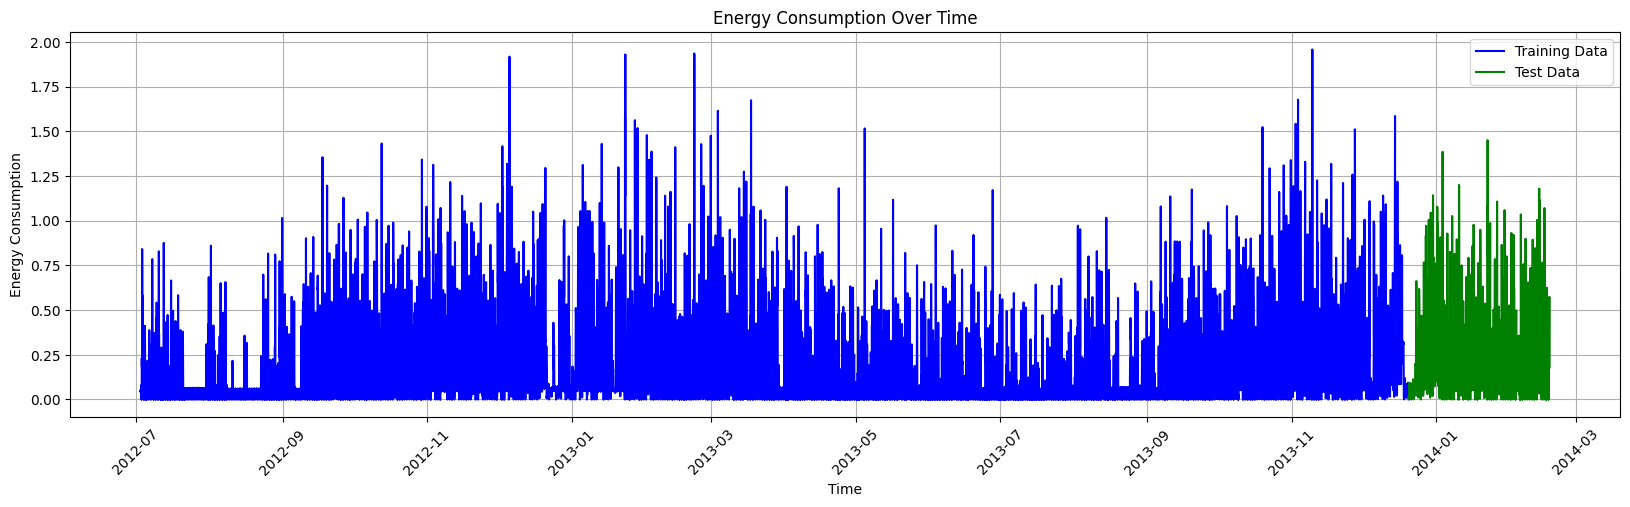

In [10]:
tr_hr = hourly_df[:int(len(hourly_df)*0.9)]
test_hr = hourly_df[int(len(hourly_df)*0.9):]

plot_training_test_data(tr_hr, test_hr)

In [12]:
tr_hr.drop(columns=['LCLid'], inplace=True)
tr_hr.set_index('timestamp', inplace=True)

In [13]:
tr_hr

,energy_consumption
timestamp,
2012-07-03 00:00:00,0.0445
2012-07-03 01:00:00,0.0525
2012-07-03 02:00:00,0.0535
2012-07-03 03:00:00,0.0430
2012-07-03 04:00:00,0.0550
...,...
2013-12-20 07:00:00,0.0935
2013-12-20 08:00:00,0.0685
2013-12-20 09:00:00,0.0730


In [16]:
taw = 1
tr_hr['lag1'] = tr_hr['energy_consumption'].shift(taw)
tr_hr['lag2'] = tr_hr['lag1'].shift(taw)
tr_hr.dropna(inplace=True)
tr_hr.rename(columns={'energy_consumption':'target'}, inplace=True)
tr_hr

,target,lag1,lag2
timestamp,,,
2012-07-03 04:00:00,0.0550,0.0430,0.0535
2012-07-03 05:00:00,0.0450,0.0550,0.0430
2012-07-03 06:00:00,0.0370,0.0450,0.0550
2012-07-03 07:00:00,0.0800,0.0370,0.0450
2012-07-03 08:00:00,0.0000,0.0800,0.0370
...,...,...,...
2013-12-20 07:00:00,0.0935,0.0775,0.0785
2013-12-20 08:00:00,0.0685,0.0935,0.0775
2013-12-20 09:00:00,0.0730,0.0685,0.0935


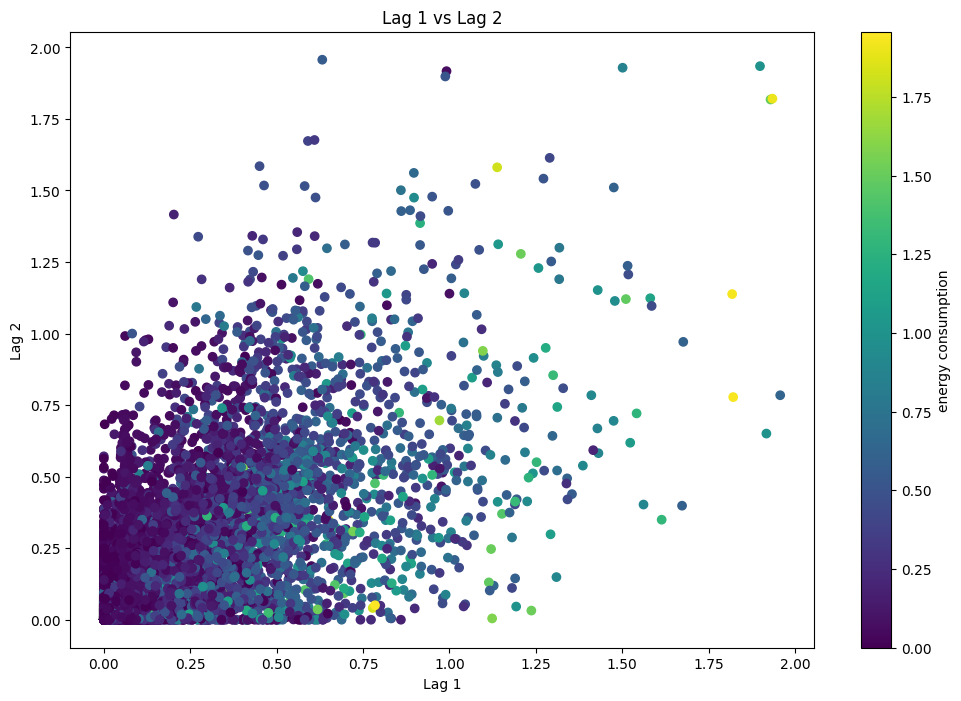

In [23]:
fig, ax= plt.subplots(1, 1, figsize=(12, 8))
scatter = ax.scatter(tr_hr['lag1'], tr_hr['lag2'], c=tr_hr['target'], cmap='viridis')
ax.set_title('Lag 1 vs Lag 2')
ax.set_xlabel('Lag 1')
ax.set_ylabel('Lag 2')
fig.colorbar(scatter, label='energy consumption')
plt.show()

Not much of an insight here. We can try to plot target vs lag1 and target vs lag2

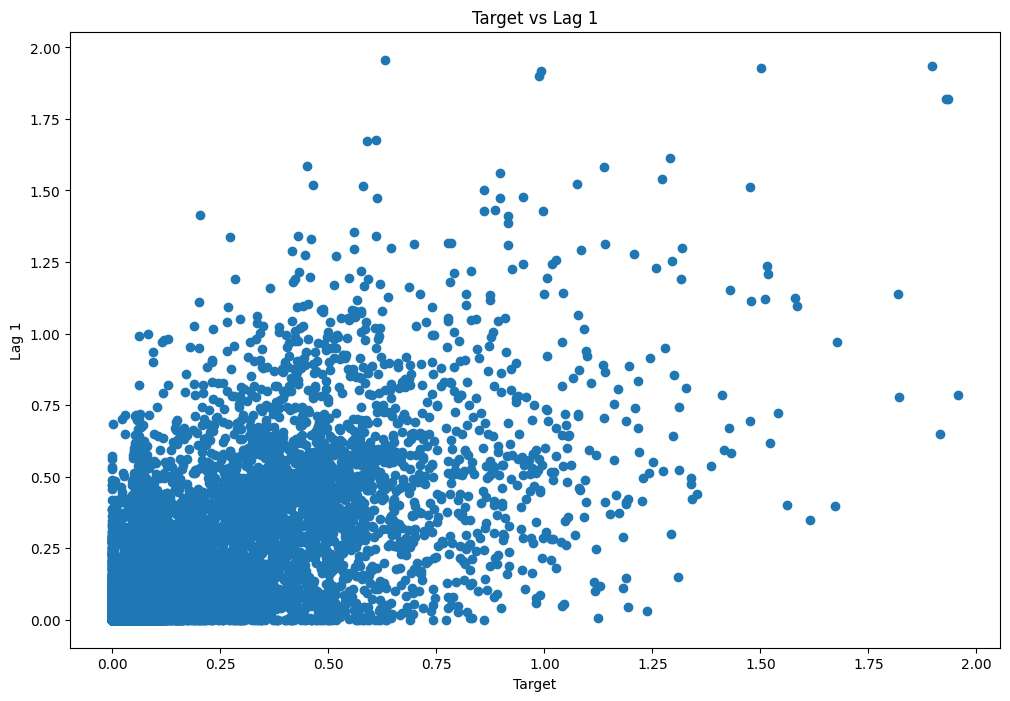

In [25]:
fig, ax= plt.subplots(1, 1, figsize=(12, 8))
scatter = ax.scatter(tr_hr['target'], tr_hr['lag1'])
ax.set_title('Target vs Lag 1')
ax.set_xlabel('Target')
ax.set_ylabel('Lag 1')
plt.show()

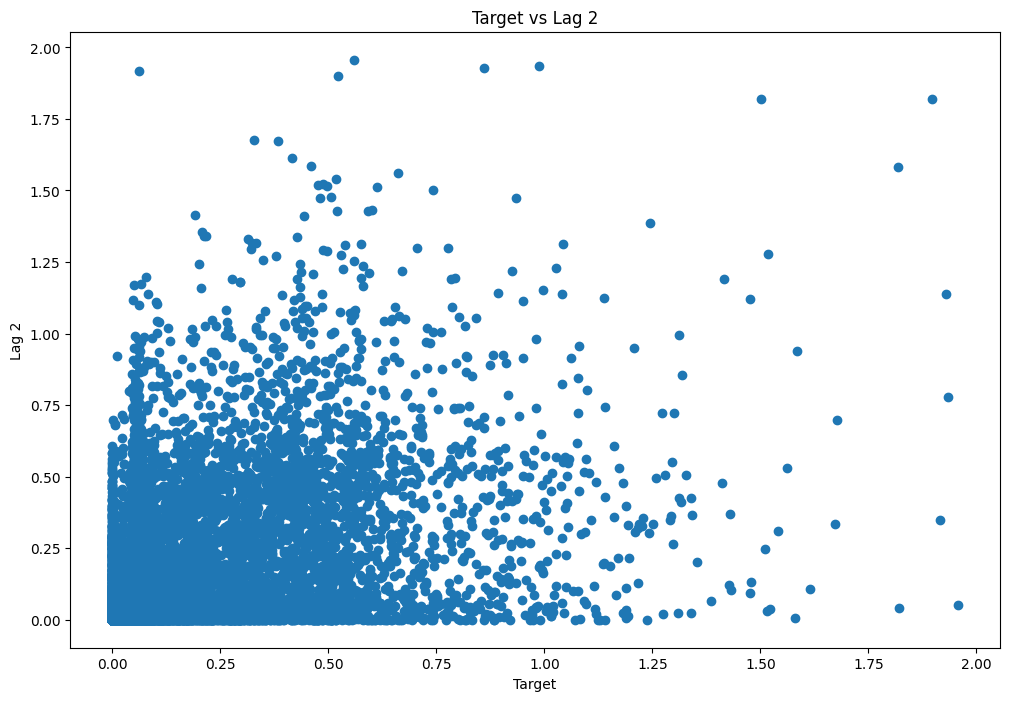

In [26]:
fig, ax= plt.subplots(1, 1, figsize=(12, 8))
scatter = ax.scatter(tr_hr['target'], tr_hr['lag2'])
ax.set_title('Target vs Lag 2')
ax.set_xlabel('Target')
ax.set_ylabel('Lag 2')
plt.show()

No clear insight here as well from the plot. From earlier assignments we know that the data can be stationary after differencing by 1. But we will try to model the adat as it is right now.

## *Modelling*

In [27]:
X = tr_hr[['lag1', 'lag2']]
y = tr_hr['target']

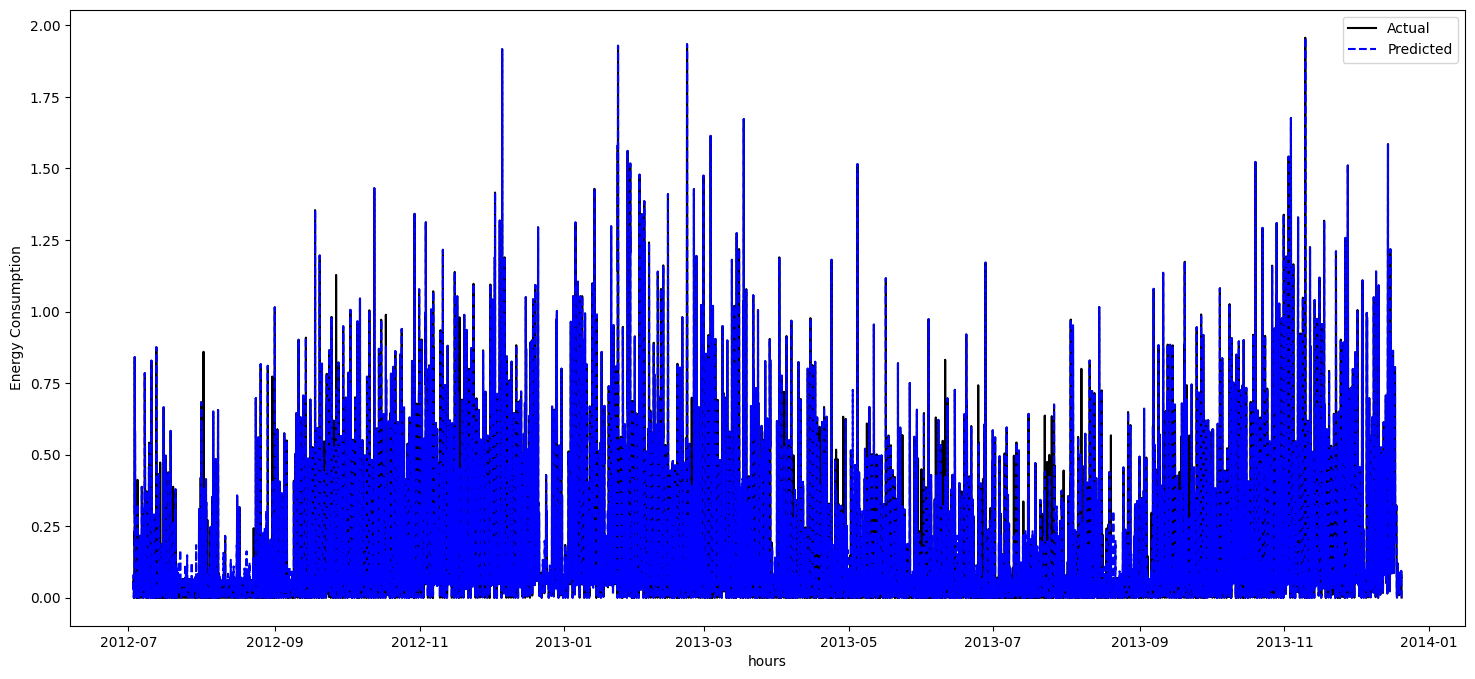

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=False)
rf_model.fit(X, y)
tr_hr['pred'] = rf_model.predict(X)
fig, ax= plt.subplots(1, 1, figsize=(18, 8))
ax.plot(tr_hr.index, tr_hr['target'], label='Actual', color='black')
ax.plot(tr_hr.index, tr_hr['pred'], label='Predicted', color='blue', linestyle='--')
ax.set_xlabel('hours')
ax.set_ylabel('Energy Consumption')
ax.legend()
plt.show()


In [30]:
# Training Error
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
def print_metrics(y_true, y_pred):
    print('Mean Absolute Error:', mean_absolute_error(y_true, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_true, y_pred))
    print('Root Mean Squared Error:', root_mean_squared_error(y_true, y_pred))
    print('R2 Score:', r2_score(y_true, y_pred))

print_metrics(tr_hr['target'], tr_hr['pred'])

Mean Absolute Error: 0.015478887927639984
Mean Squared Error: 0.0025792948863747646
Root Mean Squared Error: 0.05078675896702569
R2 Score: 0.948231608042561


Training error numbers seem good, high R2 score and low RMSE, let's try to predict the test data

## *Validation*